In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import seaborn as sns

In [21]:
# import csv
data_path = 'combined_sus_results.csv'

# Load SUS data from CSV
try:
    data = pd.read_csv(data_path)
except FileNotFoundError:
    print(f"Error: File '{data_path}' not found.")
    exit()


In [22]:
# REF: J. Brooke, “SUS: A ‘Quick and Dirty’ Usability Scale,” in Usability Evaluation In Industry, CRC Press, 1996.

def calculate_sus_score(responses):

    sum = 0
    for i in range(2, 12):
        # split between odd and even scores
        if (i % 2 == 0 ):
            odd_score = (responses[i] - 1)  # positive questions (odd numbers)
            sum += odd_score
        else:
            even_score = (5 - responses[i]) # negative questions (even numbers)
            sum += even_score

    # scale
    sus = sum * 2.5
    return sus

In [23]:
# Calculate SUS scores for each participant
data['SUS_Score'] = data.apply(calculate_sus_score, axis=1)

# Display raw SUS statistics
print("Raw SUS Statistics")
print(data)

# Display overall SUS statistics
print("\nOverall SUS Statistics:")
print(data.groupby('Modality')['SUS_Score'].describe())

Raw SUS Statistics
    Modality  Subject #  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  SUS_Score
0          0          1   4   2   4   1   5   1   3   3   4    2       77.5
1          0          2   3   3   2   3   4   2   2   3   1    1       50.0
2          0          3   3   2   3   1   3   2   3   2   3    1       67.5
3          0          4   4   2   3   2   3   1   4   1   4    1       77.5
4          0          5   3   2   4   1   4   3   5   3   3    1       72.5
5          1          1   3   3   3   1   5   2   4   4   3    1       67.5
6          1          2   2   2   2   3   4   3   2   2   3    1       55.0
7          1          3   4   2   3   1   3   2   3   1   3    1       72.5
8          1          4   5   1   5   2   5   1   5   1   4    1       95.0
9          1          5   5   1   4   2   4   2   5   3   3    1       80.0
10         2          1   2   2   2   1   3   4   3   4   3    1       52.5
11         2          2   3   2   4   4   4   2   5   1   2    1     

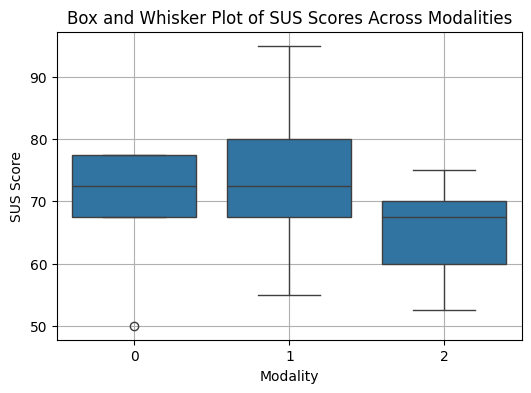

In [24]:
# Box and whisker plot for SUS scores across modalities
plt.figure(figsize=(6, 4))
sns.boxplot(x='Modality', y='SUS_Score', data=data)

plt.title('Box and Whisker Plot of SUS Scores Across Modalities')
plt.xlabel('Modality')
plt.ylabel('SUS Score')
plt.grid('on')
plt.show()

In [25]:
# Visualize SUS scores across modalities
# plt.figure(figsize=(6, 4))
# for modality, subset in data.groupby('Modality'):
#     plt.hist(subset['SUS_Score'], bins=20, edgecolor='black', alpha=0.5, label=modality)
# plt.title('Distribution of SUS Scores Across Modalities')
# plt.xlabel('SUS Score')
# plt.ylabel('Frequency')
# plt.legend()
# plt.grid('on')
# plt.show()

In [26]:
# Perform ANOVA for statistical comparison
modality_groups = [subset['SUS_Score'] for modality, subset in data.groupby('Modality')]
f_statistic, p_value = f_oneway(*modality_groups)

# Display ANOVA results
print("\nANOVA Results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


ANOVA Results:
F-statistic: 0.7113702623906706
P-value: 0.5105523820549981
